<a href="https://colab.research.google.com/github/andrewseltzer99/ITP449_Project_S-P500_Analysis/blob/main/Exploratory_Data_Analysis_Project_ipynb_Andrew_Seltzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.patches as mpatches

In [36]:
SPYdf = pd.read_csv('SPY.csv', header=0, index_col=0, parse_dates=[0], squeeze=True)
# get dataframe with dates closest to Nov 1
beginning = SPYdf.iloc[SPYdf.reset_index().groupby(SPYdf.index.to_period('M'))['Date'].idxmin()]

finBeginning = beginning[beginning.index.month == 11]

print(finBeginning)
# get dataframe with dates closest to Feb 15
fifteenth = []
days = []
print(fifteenth)
found = False
for i, y in SPYdf.iterrows():
  if i.month == 2:
    if i.day >= 15 and i.day<19:
      if found == False:
        fifteenth.append(SPYdf.loc[i, 'Close'])
        days.append(i)
        found = True
    if i.day > 17:
      found = False
        
finEnd = pd.DataFrame({'Close_x':fifteenth}, index=days)
finEnd.index.name = 'Date'
print(finEnd)

                  Open        High  ...   Adj Close     Volume
Date                                ...                       
1993-11-01   46.781250   47.000000  ...   28.264351      36400
1994-11-01   47.281250   47.281250  ...   28.976826     435200
1995-11-01   58.281250   58.781250  ...   37.176891     415700
1996-11-01   70.984375   71.156250  ...   45.595959     821300
1997-11-03   93.187500   94.375000  ...   61.709930    5548500
1998-11-02  110.812500  111.875000  ...   74.446083    6501400
1999-11-01  136.500000  137.000000  ...   91.258148    4006500
2000-11-01  142.250000  143.250000  ...   96.856712    6753600
2001-11-01  106.599998  109.010002  ...   74.685722   29806800
2002-11-01   88.349998   90.820000  ...   63.023819   51878900
2003-11-03  105.750000  106.610001  ...   75.219902   37589300
2004-11-01  113.559998  113.839996  ...   81.856911   36720900
2005-11-01  120.580002  120.900002  ...   88.634094   66365100
2006-11-01  138.220001  138.309998  ...  102.510193   8

In [39]:


losses = df[df['Close_x'] < df['Close']]
print('\nThere were', len(losses), 'instances where the post-holiday price was lower than the pre-holiday price:')
for x in range(len(losses)):
  print('Date:', losses.index[x] ,'Pre-Holiday:',losses['Close'][x], " Post-Holiday:",losses['Close_x'][x])

# create a dataframe with the index year and column 
print('\n\nIf you were to purchase 1 share of the S&P 500 during the Pre-Holiday period and sold it after the Holiday period, you would have made:')
sum = 0
for x in range(len(df)):
  sum += df['Close_x'][x] - df['Close'][x]
print(sum, 'dollars')
print('Now if you had bought 500 shares you would have:')
sum = 0
for x in range(len(df)):
  sum += (df['Close_x'][x] - df['Close'][x])*500
print(sum, 'dollars')

print('\nHad you just bought a share of S&P and held it from November 1 1993 till February 15 2021, you would have made:')
held = finEnd['Close_x'][27] - finBeginning['Close'][0]
print(held, 'dollars')
print('Now if you had bought 500 shares you would have:')
print(held*500, 'dollars. Sheeeesh that is a lot!')


There were 5 instances where the post-holiday price was lower than the pre-holiday price:
Date: 2001-02-15 00:00:00 Pre-Holiday: 142.46875  Post-Holiday: 133.33999599999999
Date: 2003-02-18 00:00:00 Pre-Holiday: 90.269997  Post-Holiday: 85.629997
Date: 2008-02-15 00:00:00 Pre-Holiday: 151.029999  Post-Holiday: 135.139999
Date: 2009-02-17 00:00:00 Pre-Holiday: 97.110001  Post-Holiday: 79.220001
Date: 2016-02-16 00:00:00 Pre-Holiday: 210.38999900000002  Post-Holiday: 189.779999


If you were to purchase 1 share of the S&P 500 during the Pre-Holiday period and sold it after the Holiday period, you would have made:
207.74994399999989 dollars
Now if you had bought 500 shares you would have:
103874.97199999995 dollars

Had you just bought a share of S&P and held it from November 1 1993 till February 15 2021, you would have made:
345.331238 dollars
Now if you had bought 500 shares you would have:
172665.619 dollars. Sheeeesh that is a lot!


                 Open      High        Low  ...  Adj Close   Volume     Close_x
Date                                        ...                                
1994-02-15  46.781250  47.00000  46.781250  ...  28.264351    36400   47.468750
1995-02-15  47.281250  47.28125  46.937500  ...  28.976826   435200   48.703125
1996-02-15  58.281250  58.78125  58.234375  ...  37.176891   415700   65.203125
1997-02-18  70.984375  71.15625  70.265625  ...  45.595959   821300   81.875000
1998-02-17  93.187500  94.37500  92.875000  ...  61.709930  5548500  102.500000

[5 rows x 7 columns]


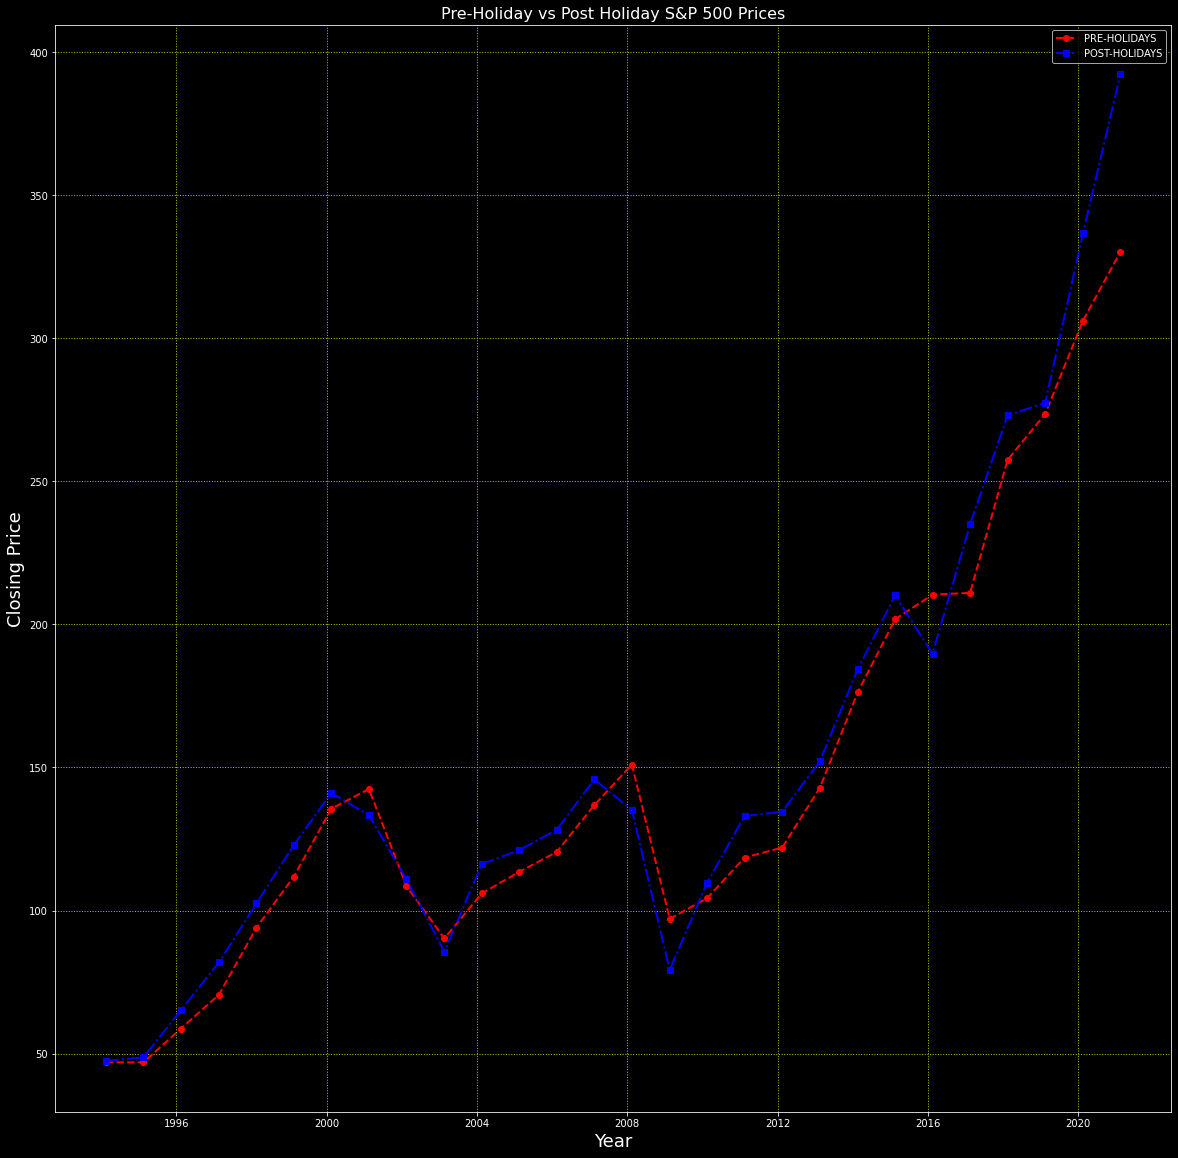

In [40]:
finBeg = finBeginning.set_index(finEnd.index)

df = pd.merge(finBeg, finEnd, on='Date')
print(df.head())

plt.plot(df.index, df['Close'], marker ='o', linestyle='--', color = 'r', label='PRE-HOLIDAYS')
plt.plot(df.index, df['Close_x'], marker ='s', linestyle='-.', color = 'b', label='POST-HOLIDAYS')
plt.rcParams["figure.figsize"] = [20,20]
plt.xlabel('Year', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.grid(True, color='y', linestyle=':')
plt.style.use('dark_background')
plt.title('Pre-Holiday vs Post Holiday S&P 500 Prices')
plt.legend()
plt.show()



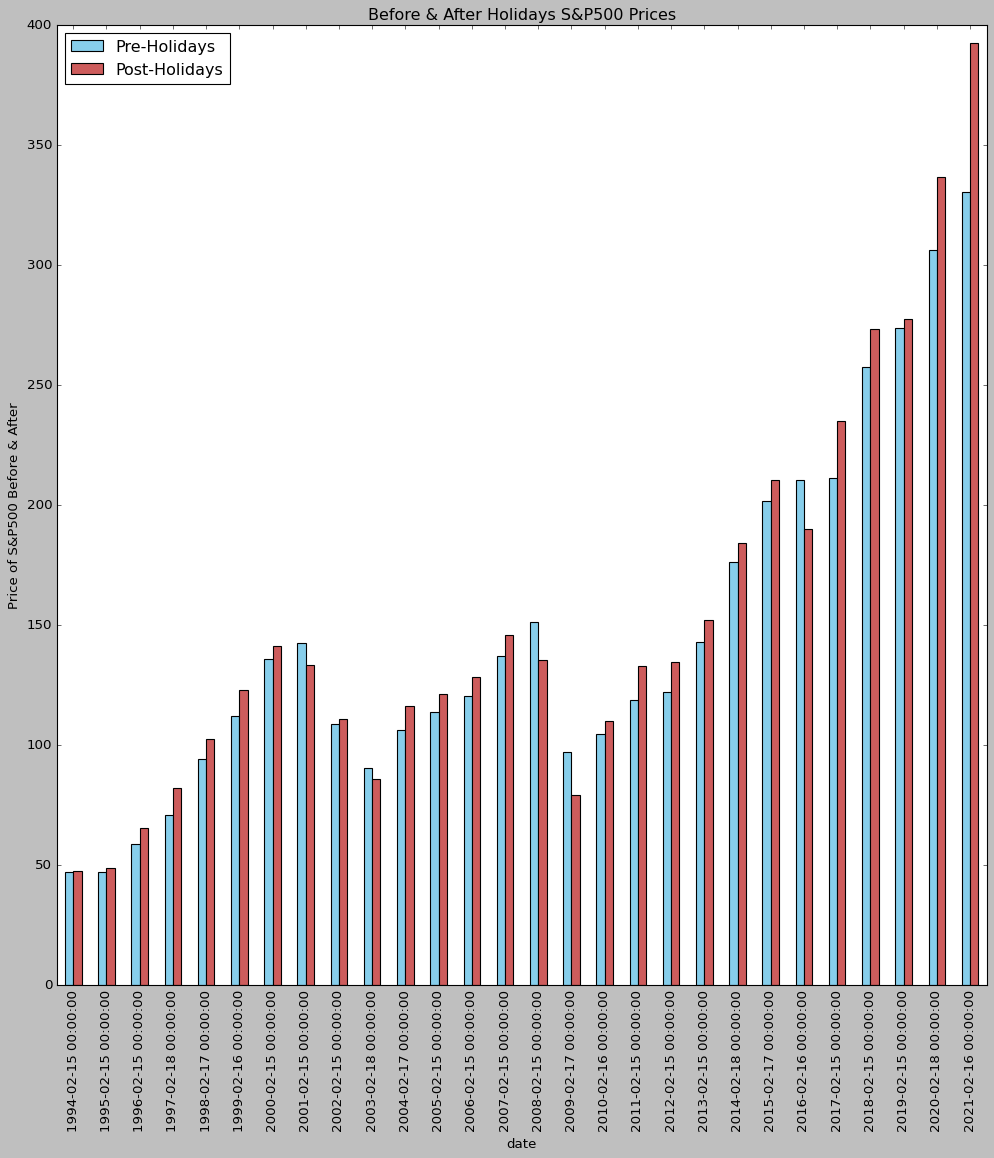

In [43]:
# grouped bar chart
d1 = pd.DataFrame({"Pre-Holidays":df['Close'],"Post-Holidays":df['Close_x']}, index=df.index)

d1.dropna(subset=['Pre-Holidays'], inplace=True)


ax = d1.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Before & After Holidays S&P500 Prices")
ax.set_xlabel("date")
ax.set_ylabel("Price of S&P500 Before & After")

plt.xticks(rotation = 90)


plt.style.use('classic')
plt.show()

The mean difference in S&P500 points between Post-Holiday and Pre-Holiday is 7.419640857142809


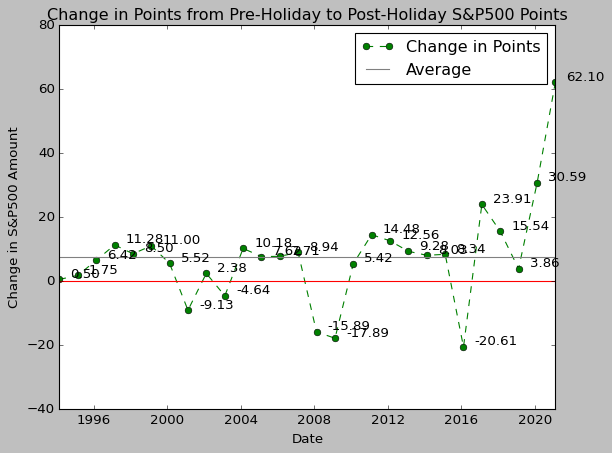

In [42]:

difference = df['Close_x'].mean() - df['Close'].mean()
percent = (df['Close_x'].mean() / df['Close'].mean() - 1)*100
print('The mean difference in S&P500 points between Post-Holiday and Pre-Holiday is', difference)
xs = df.index
ys = df['Close_x']-df['Close']
a = np.empty(len(df.index)) # make empty array of 28 values
b = np.empty(len(df.index))
a.fill(difference) # fill it with the mean of difference in points
b.fill(0)
plt.plot(xs, ys, marker ='o', linestyle='--', color = 'green', label='Change in Points')
plt.plot(df.index, a, color='gray', label='Average')
plt.plot(df.index, b, color='red')
plt.title('Change in Points from Pre-Holiday to Post-Holiday S&P500 Points')
plt.xlabel('Date')
plt.ylabel('Change in S&P500 Amount')
plt.style.use('classic')
plt.rcParams["figure.figsize"] = [15,15]
plt.legend()
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(10,2), # distance from text to points (x,y)
                 ha='left') 
plt.show()


On average, there was a percent change by 5.085213420342916%


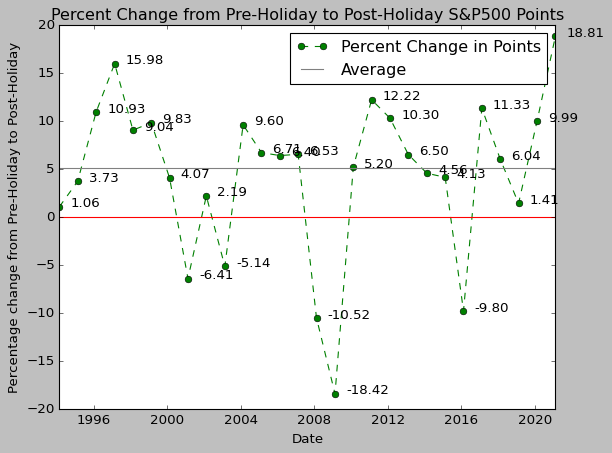

In [44]:
percent = (df['Close_x'].mean() / df['Close'].mean() - 1)*100
print('\nOn average, there was a percent change by ', percent, '%', sep="")
xs = df.index
ys = (df['Close_x']/df['Close']-1)*100
entries=len(df.index) # get length of df
a = np.empty((entries)) # make empty array of 28 values
b = np.empty(len(df.index))
b.fill(0)
a.fill(percent) # fill it with the mean of difference in points
plt.plot(xs, ys, marker ='o', linestyle='--', color = 'green', label='Percent Change in Points')
plt.plot(df.index, a, color='gray', label='Average')
plt.plot(df.index, b, color='red')
plt.title('Percent Change from Pre-Holiday to Post-Holiday S&P500 Points')
plt.xlabel('Date')
plt.style.use('classic')
plt.rcParams["figure.figsize"] = [15,15]
plt.ylabel('Percentage change from Pre-Holiday to Post-Holiday')
plt.legend()
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0), # distance from text to points (x,y)
                 ha='left') 
plt.show()

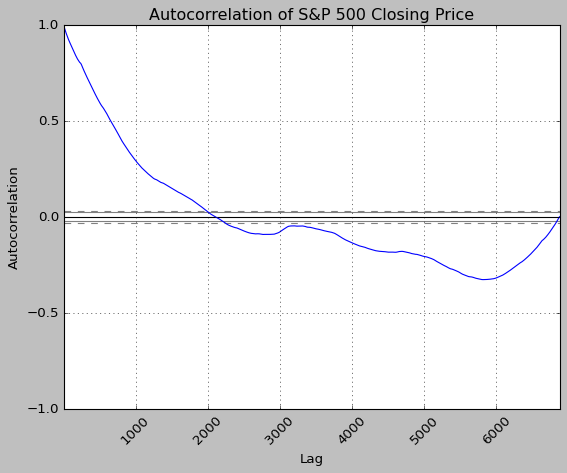

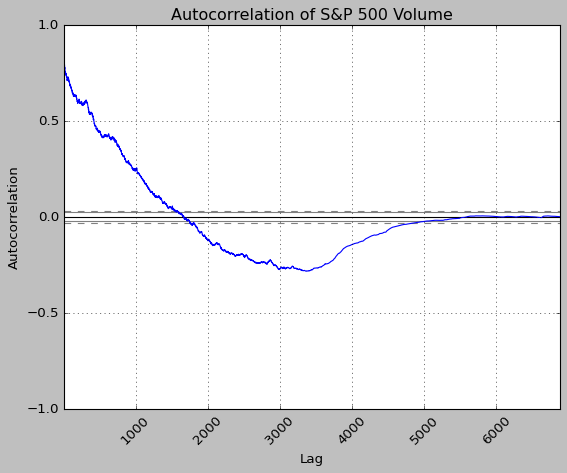

In [46]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(SPYdf['Close'])
plt.style.use('classic')
plt.xticks(rotation = 45)
plt.title('Autocorrelation of S&P 500 Closing Price')
plt.show()

autocorrelation_plot(SPYdf['Volume'])
plt.style.use('classic')
plt.xticks(rotation = 45)
plt.title('Autocorrelation of S&P 500 Volume')
plt.show()


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


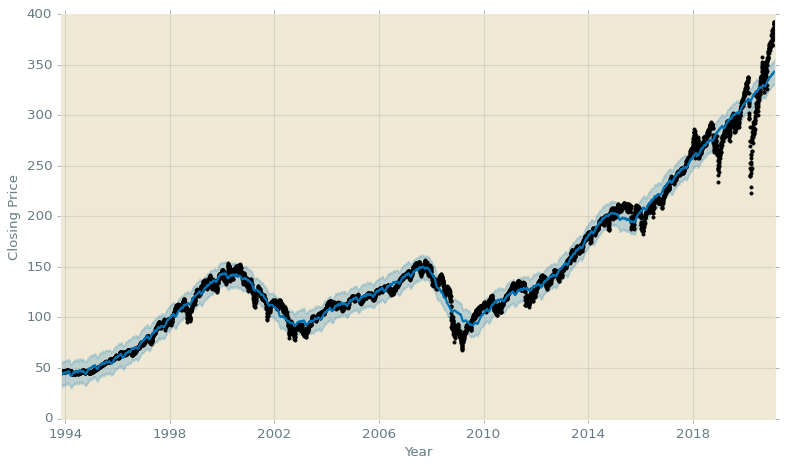

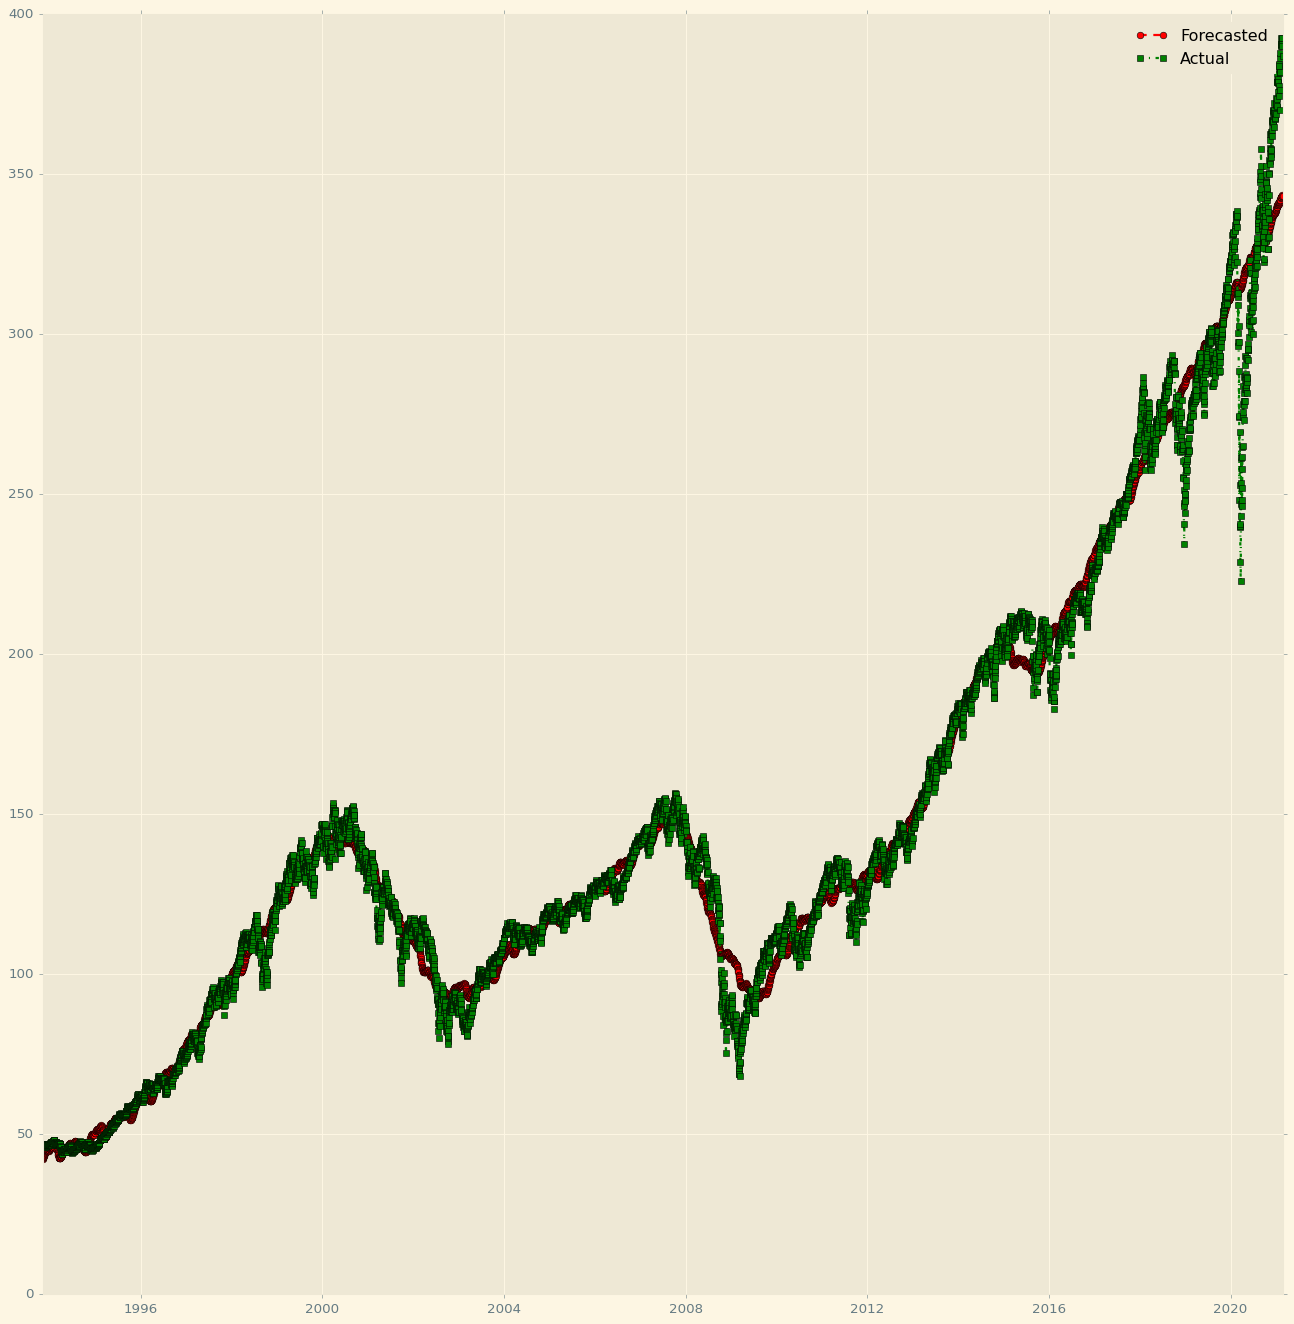

In [48]:
from fbprophet import Prophet
# define the model
model = Prophet()
# fit the model
newDf = pd.DataFrame()

# forecasting for if we only used pre-holiday dates
newDf['ds'] = SPYdf.index
newDf['y'] = SPYdf['Close'].values
model.fit(newDf)
forecast = model.predict(newDf)

#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
plt.style.use('Solarize_Light2')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.show()
plt.plot(SPYdf.index,forecast['yhat'], marker ='o', linestyle='--', color = 'r', label='Forecasted')
plt.plot(SPYdf.index, SPYdf['Close'], marker ='s', linestyle='-.', color = 'g', label='Actual')
plt.rcParams["figure.figsize"] = [20,20]
plt.legend()
plt.show()


MAE: 3.724


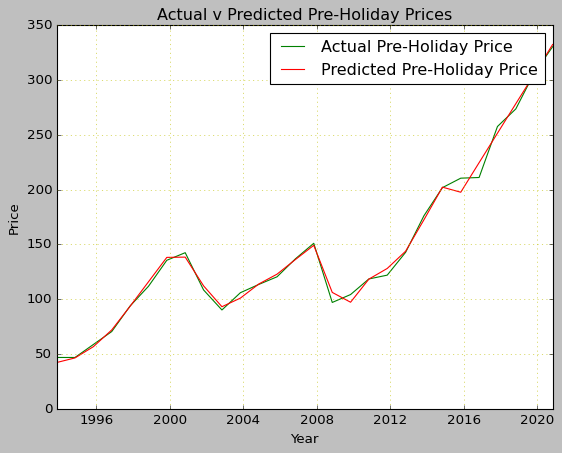

In [ ]:
step1 = pd.DataFrame(index=forecast['ds'])
step1['yhat'] = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error


step2 = step1.iloc[step1.reset_index().groupby(step1.index.to_period('M'))['ds'].idxmin()]
step2 = step2[step2.index.month == 11];
# calculate MAE between expected and predicted values for december
y_true = finBeginning['Close'].values
y_pred = step2['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae) # lower MAE model means the pre-holiday prices were predicted more accurately
plt.plot(finBeginning.index, y_true, color='g', label='Actual Pre-Holiday Price')
plt.plot(finBeginning.index, y_pred, color='r', label='Predicted Pre-Holiday Price')
plt.legend()
plt.rcParams["figure.figsize"] = [40,40]
plt.grid(True, color='y', linestyle=':')
plt.style.use('classic')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Actual v Predicted Pre-Holiday Prices')
plt.show() # predicted catches the general trend but has a difficult time



MAE: 3.724


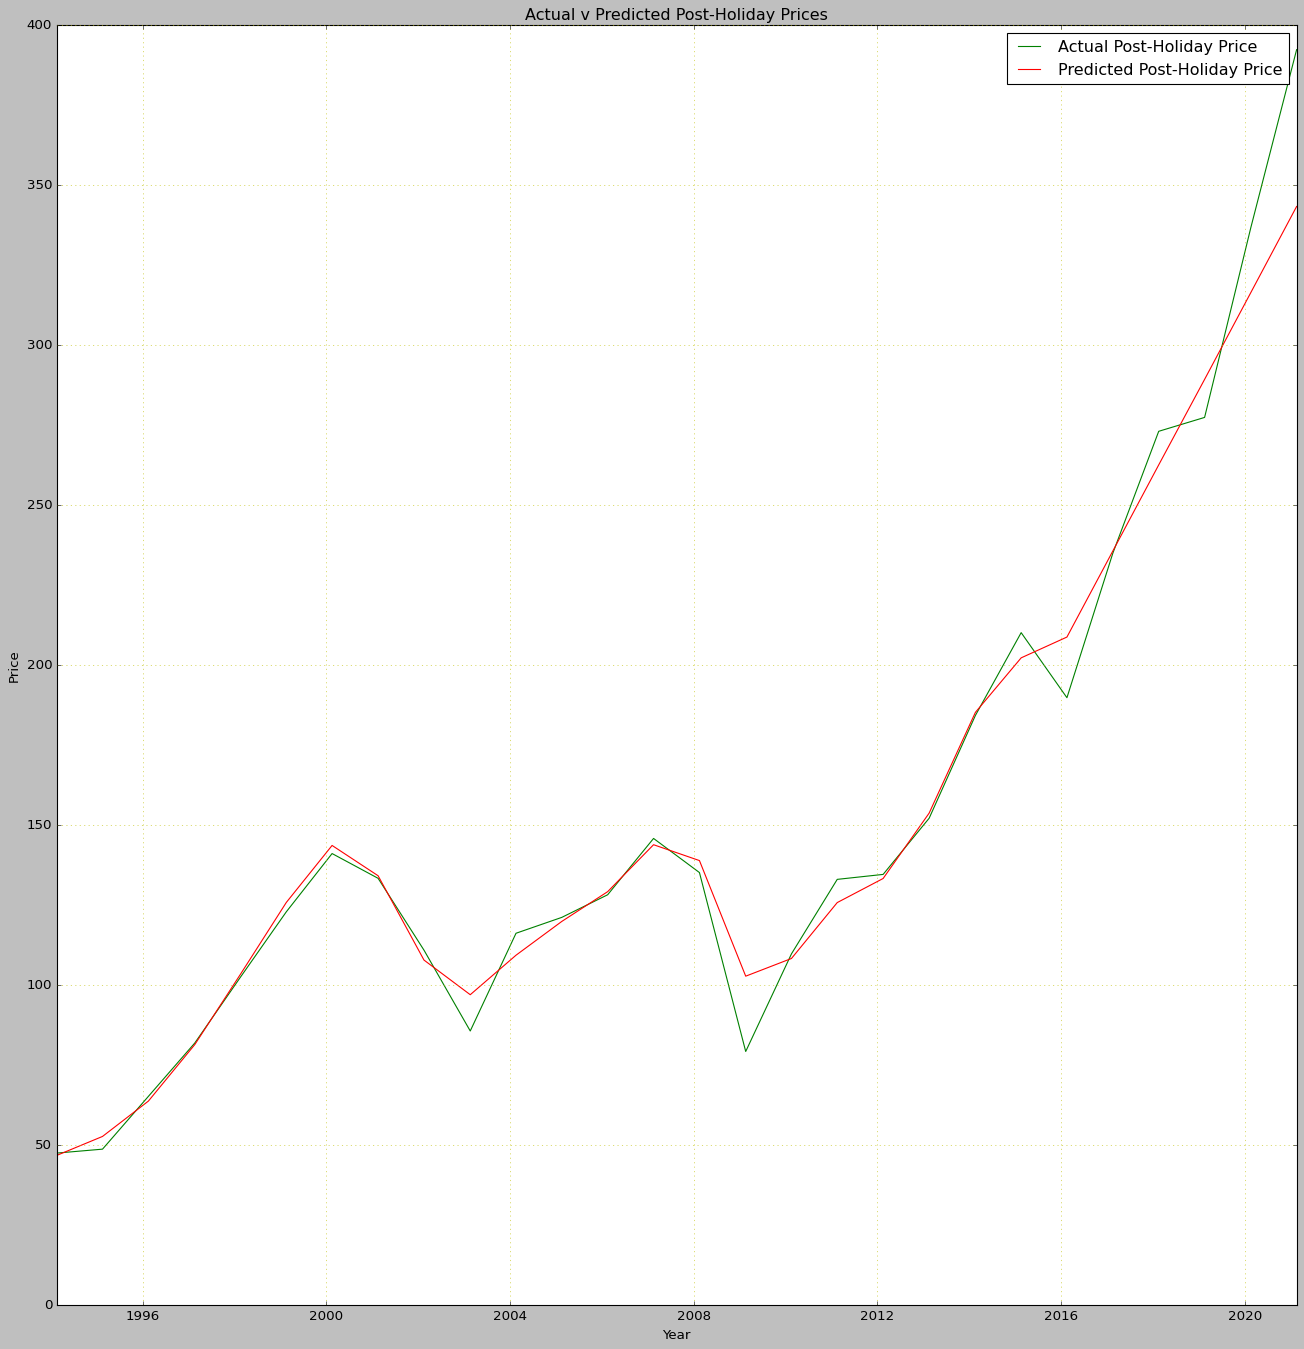

In [ ]:


first = []
days = []
found = False
for i, y in step1.iterrows():
  if i.month == 2:
    if i.day >= 15 and i.day<19:
      if found == False:
        first.append(step1.loc[i, 'yhat'])
        days.append(i)
        found = True
    if i.day > 17:
      found = False


step3 = pd.DataFrame({'yhat':first}, index=days)
step3.index.name = 'ds'
# calculate MAE between expected and predicted values for december
y_true2 = finEnd['Close_x'].values
y_pred2 = step3['yhat'].values
mae2 = mean_absolute_error(y_true2, y_pred2)
print('MAE: %.3f' % mae)
plt.rcParams["figure.figsize"] = [20,20]
plt.plot(finEnd.index, y_true2, color='g', label='Actual Post-Holiday Price')
plt.plot(finEnd.index, y_pred2, color='r', label='Predicted Post-Holiday Price')
plt.legend()
plt.grid(True, color='y', linestyle=':')
plt.style.use('classic')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Actual v Predicted Post-Holiday Prices')
plt.show() # predicted catches the general trend but has a difficult time

           ds       trend  ...  multiplicative_terms_upper        yhat
0  2021-03-01  342.805327  ...                         0.0  342.229351
1  2021-04-01  345.088918  ...                         0.0  342.621064
2  2021-05-01  347.298843  ...                         0.0  349.148095
3  2021-06-01  349.582434  ...                         0.0  350.169303
4  2021-07-01  351.792359  ...                         0.0  351.300633
5  2021-08-01  354.075950  ...                         0.0  356.064788
6  2021-09-01  356.359540  ...                         0.0  356.199086
7  2021-10-01  358.569466  ...                         0.0  355.638699
8  2021-11-01  360.853056  ...                         0.0  358.921877
9  2021-12-01  363.062982  ...                         0.0  363.545874
10 2022-01-01  365.346572  ...                         0.0  367.682867
11 2022-02-01  367.630162  ...                         0.0  368.574242
12 2022-03-01  369.692759  ...                         0.0  369.266221
13 202

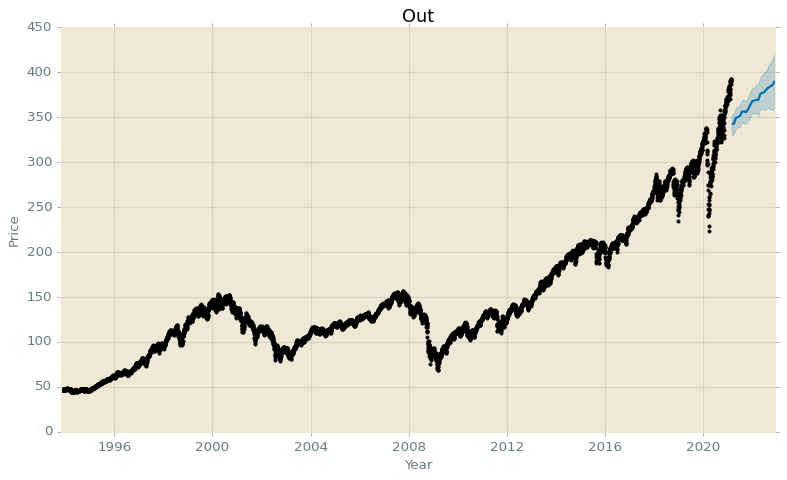

In [ ]:
# make an out-of-sample forecast

# define the period for which we want a prediction
future = list()
for i in range(3, 13):
	date = '2021-%02d' % i
	future.append([date])
for i in range(1, 13):
	date = '2022-%02d' % i
	future.append([date])
future = pd.DataFrame(future)

future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast2 = model.predict(future)
model.plot(forecast2)
print(forecast2)
plt.title('Out')
plt.style.use('classic')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 6875
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14050.384
Method:                       css-mle   S.D. of innovations              1.868
Date:                Fri, 05 Mar 2021   AIC                          28114.769
Time:                        04:50:59   BIC                          28162.618
Sample:                             1   HQIC                         28131.272
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0495      0.020      2.427      0.015       0.010       0.090
ar.L1.D.Close    -0.1215      0.012    -10.073      0.000      -0.145      -0.098
ar.L2.D.Close     0.0541      0.012     

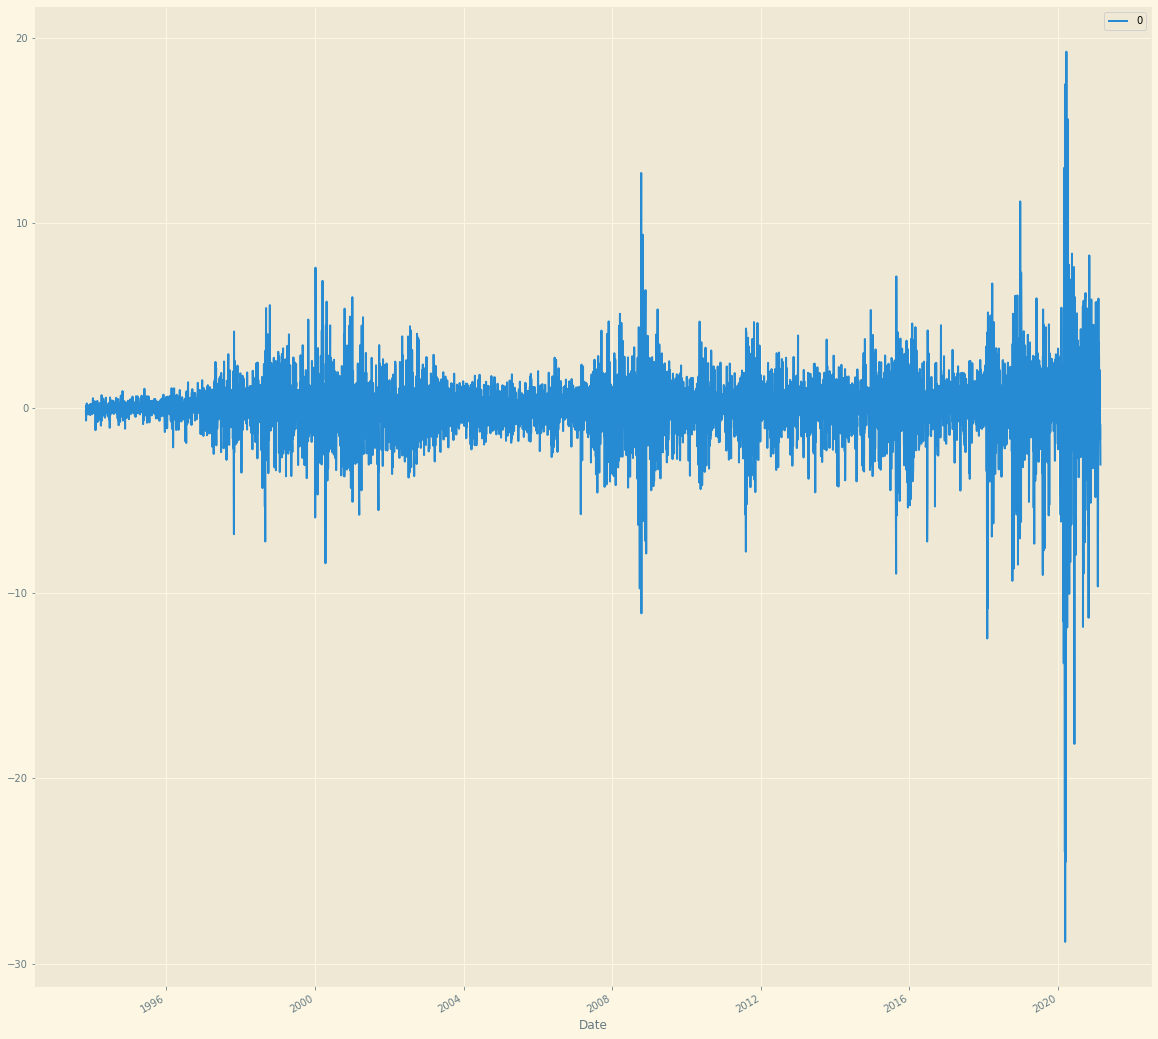

Distribution of Residuals


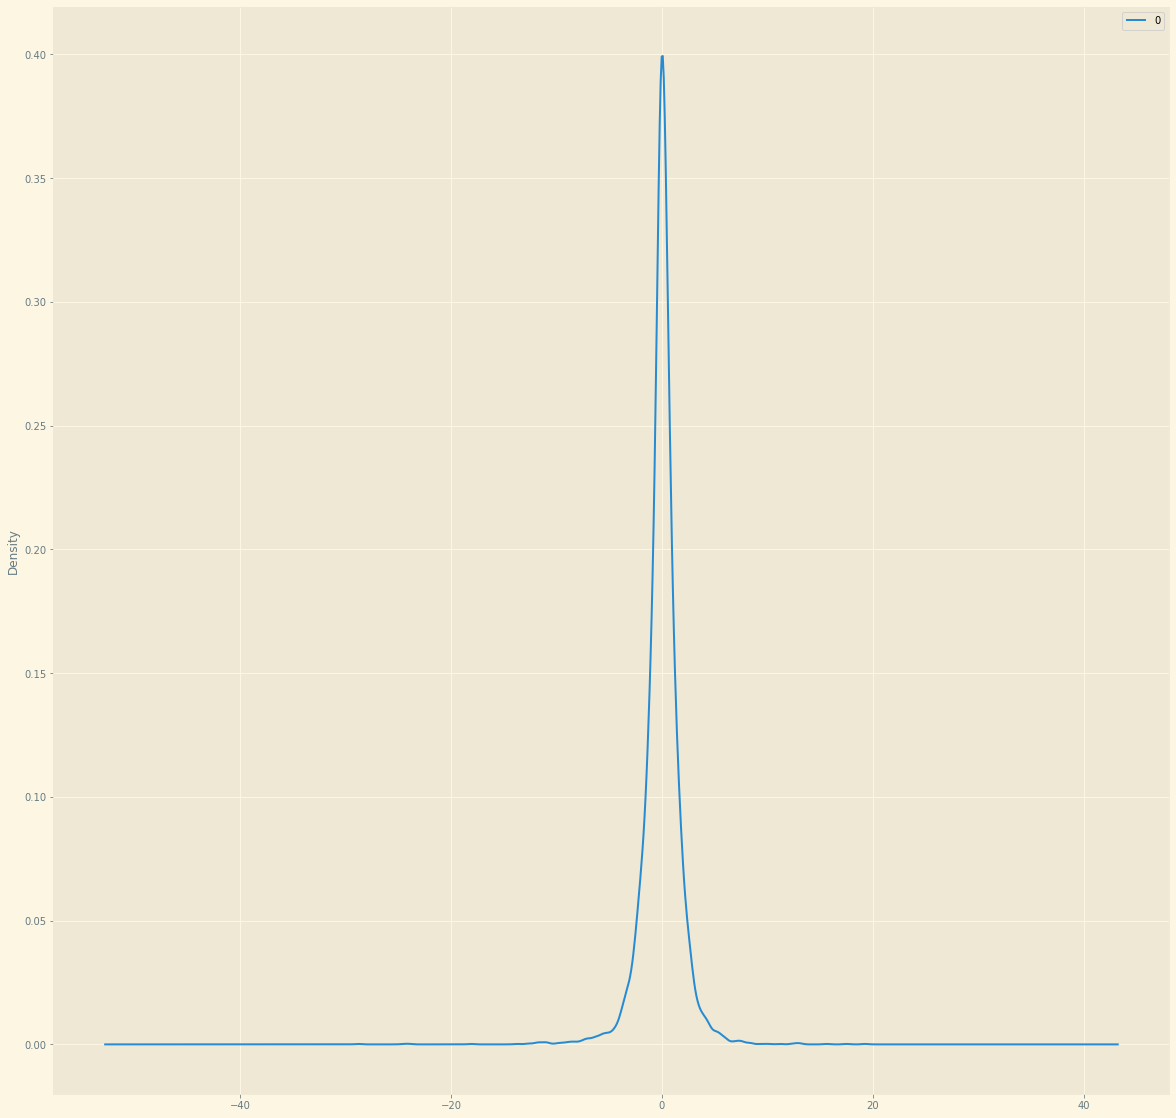

                 0
count  6875.000000
mean     -0.000002
std       1.867917
min     -28.830746
25%      -0.653012
50%       0.036557
75%       0.729355
max      19.279604
                   0
Date                
2020-09-29 -1.923461
2020-09-30  2.048306
2020-10-01  2.735217
2020-10-02 -2.895973
2020-10-05  5.200834
...              ...
2021-02-16 -0.235323
2021-02-17 -0.119110
2021-02-18 -1.669686
2021-02-19 -0.858700
2021-02-22 -3.085563

[100 rows x 1 columns]


In [31]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.dates as mdates

#data.index = data.index.to_period('M')
# fit model

model = ARIMA(SPYdf['Close'], order=(5,1,0)) # using the 5,1,0 model
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
print(model_fit.predict())



# line plot of residuals
residuals = pd.DataFrame(model_fit.resid) # residuals - difference between actual and predicted values
residuals.plot()

plt.show()
# density plot of residuals
residuals.plot(kind='kde')
print('Distribution of Residuals')
plt.show()
# summary stats of residuals
print(residuals.describe())

print(residuals.tail(100))
